In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [20]:
X = df[["TV"]]
y = df.sales

model = DecisionTreeRegressor(max_depth=6, random_state=0)
model.fit(X, y)

DecisionTreeRegressor(max_depth=6, random_state=0)

C:\Users\kurs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


0.7805004963055056


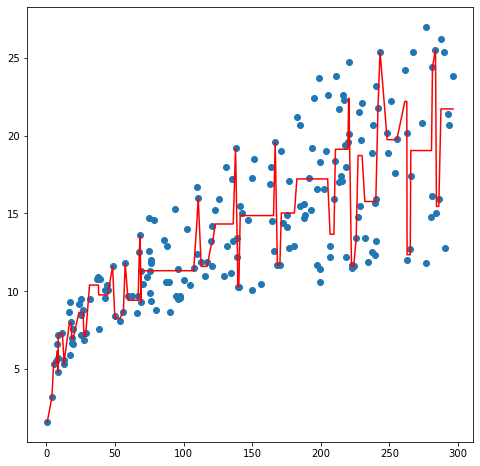

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X, y)

x = np.unique(X.values).reshape(-1,1)
y_pred = model.predict(x)
plt.plot(x, y_pred, c="r")

print(r2_score(y , model.predict(X) ))